Basic data vis

In [10]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\manir\\.cache\\kagglehub\\datasets\\yagunnersya\\fifa-21-messy-raw-dataset-for-cleaning-exploring\\versions\\2\\fifa21 raw data v2.csv")

print("Dataset loaded successfully.")


Dataset loaded successfully.


C:\Users\manir\AppData\Local\Temp\ipykernel_51588\2745284841.py:4: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\manir\\.cache\\kagglehub\\datasets\\yagunnersya\\fifa-21-messy-raw-dataset-for-cleaning-exploring\\versions\\2\\fifa21 raw data v2.csv")


In [11]:

print(df.columns)


Index(['ID', 'Name', 'LongName', 'photoUrl', 'playerUrl', 'Nationality', 'Age',
       '↓OVA', 'POT', 'Club', 'Contract', 'Positions', 'Height', 'Weight',
       'Preferred Foot', 'BOV', 'Best Position', 'Joined', 'Loan Date End',
       'Value', 'Wage', 'Release Clause', 'Attacking', 'Crossing', 'Finishing',
       'Heading Accuracy', 'Short Passing', 'Volleys', 'Skill', 'Dribbling',
       'Curve', 'FK Accuracy', 'Long Passing', 'Ball Control', 'Movement',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Power', 'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Mentality', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Defending', 'Marking', 'Standing Tackle',
       'Sliding Tackle', 'Goalkeeping', 'GK Diving', 'GK Handling',
       'GK Kicking', 'GK Positioning', 'GK Reflexes', 'Total Stats',
       'Base Stats', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'PAC', 'SHO', 'PAS',
       'DRI', 'DEF', 

In [12]:
# Check data types of Height and Weight columns
print(df[['Height', 'Weight']].dtypes)


Height    object
Weight    object
dtype: object


Cleaning and Converting Height

In [13]:
import re

# Convert height from format like "5'11" to centimeters
def height_to_cm(height):
    match = re.match(r"(\d+)'(\d+)\"", height)
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return (feet * 30.48) + (inches * 2.54)  # Convert to centimeters
    return None

df['Height'] = df['Height'].apply(height_to_cm)


Step 2: Cleaning and Converting Weight

In [14]:
# Function to convert weight to kilograms
def convert_weight(weight):
    if 'lbs' in weight:
        return float(weight.replace('lbs', '')) * 0.453592  # Convert lbs to kg
    elif 'kg' in weight:
        return float(weight.replace('kg', ''))  # Remove kg and keep as float
    else:
        return None  # Handle unexpected formats gracefully

# Apply conversion
df['Weight'] = df['Weight'].apply(convert_weight)



In [15]:
# Check data types of Height and Weight columns
print(df[['Height', 'Weight']].dtypes)


Height    float64
Weight    float64
dtype: object


Step 3: Separate the Joined Column into Year, Month, and Day

In [16]:
# Check rows where 'Joined' does not match the expected format
invalid_joined = df[~df['Joined'].str.match(r'^\d{4}-\d{2}-\d{2}$', na=False)]
print("Rows with invalid 'Joined' format:\n", invalid_joined[['Joined']])



Rows with invalid 'Joined' format:
              Joined
0       Jul 1, 2004
1      Jul 10, 2018
2      Jul 16, 2014
3      Aug 30, 2015
4       Aug 3, 2017
...             ...
18974  Jul 13, 2018
18975   Aug 1, 2020
18976   Mar 8, 2019
18977  Sep 22, 2020
18978  Jul 29, 2019

[18979 rows x 1 columns]


In [17]:
# Convert 'Joined' to datetime format
df['Joined'] = pd.to_datetime(df['Joined'], errors='coerce', format='%b %d, %Y')

# Drop rows where 'Joined' could not be converted
df = df.dropna(subset=['Joined'])


In [18]:
# Extract year, month, and day into separate columns
df['Joined_Year'] = df['Joined'].dt.year
df['Joined_Month'] = df['Joined'].dt.month
df['Joined_Day'] = df['Joined'].dt.day


In [19]:
def clean_currency(column):
    # Remove € symbol and convert K to thousands, M to millions
    return column.replace({'€': '', 'K': 'e3', 'M': 'e6'}, regex=True).astype(float)

# Apply to each column
df['Value'] = clean_currency(df['Value'])
df['Wage'] = clean_currency(df['Wage'])
df['Release Clause'] = clean_currency(df['Release Clause'])


In [20]:
df['Hits'] = df['Hits'].str.replace('\n', '', regex=True)


data cleaning

In [21]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])


Missing values in each column:
 Height           18939
Loan Date End    17966
Hits              2622
dtype: int64


In [22]:
# Fill missing values in Height with the median
df['Height'].fillna(df['Height'].median(), inplace=True)


C:\Users\manir\AppData\Local\Temp\ipykernel_51588\764758248.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Height'].fillna(df['Height'].median(), inplace=True)


In [23]:
# Fill missing values in Loan Date End with a placeholder
df['Loan Date End'].fillna("Not on Loan", inplace=True)


C:\Users\manir\AppData\Local\Temp\ipykernel_51588\2614486537.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Loan Date End'].fillna("Not on Loan", inplace=True)


In [24]:
# Fill missing values in Hits with 0
df['Hits'].fillna(0, inplace=True)


C:\Users\manir\AppData\Local\Temp\ipykernel_51588\1888559760.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hits'].fillna(0, inplace=True)


In [25]:
# Check to confirm no missing values remain
print(df.isnull().sum())


ID              0
Name            0
LongName        0
photoUrl        0
playerUrl       0
               ..
PHY             0
Hits            0
Joined_Year     0
Joined_Month    0
Joined_Day      0
Length: 80, dtype: int64


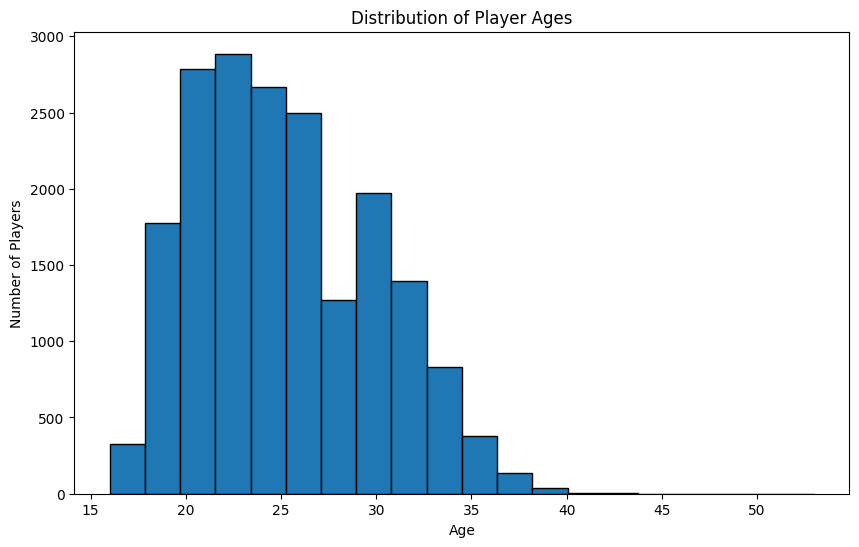

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the cleaned data

# Plot 1: Distribution of Player Ages
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=20, edgecolor='black')
plt.title('Distribution of Player Ages')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()




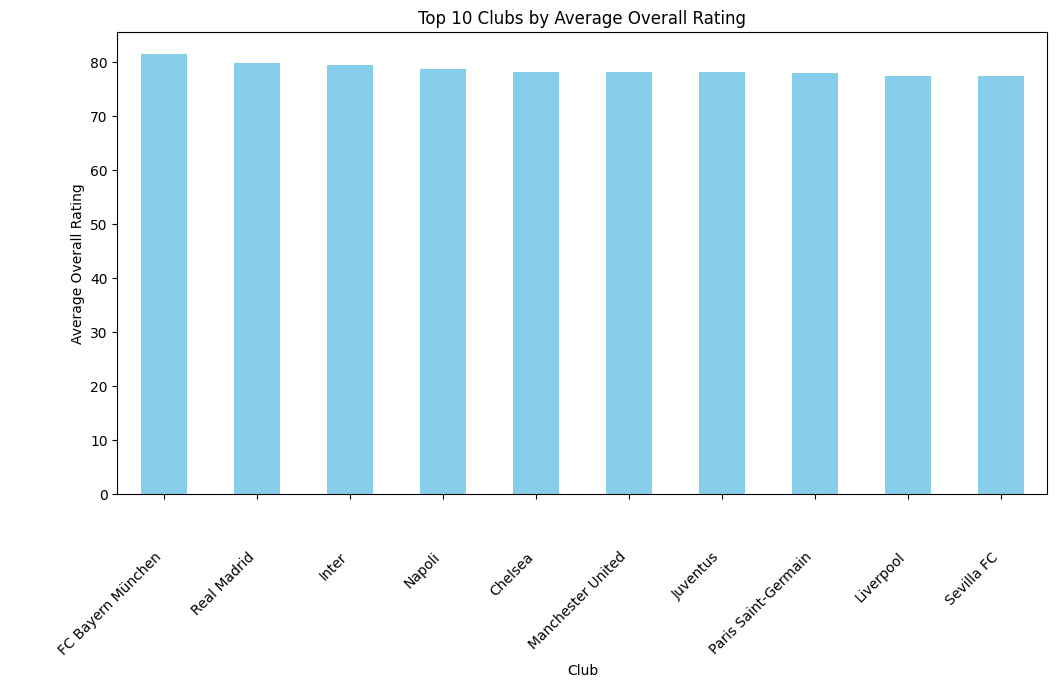

In [27]:
# Plot 2: Top 10 Clubs by Average Overall Rating
top_clubs = df.groupby('Club')['↓OVA'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_clubs.plot(kind='bar', color='skyblue')
plt.title('Top 10 Clubs by Average Overall Rating')
plt.xlabel('Club')
plt.ylabel('Average Overall Rating')
plt.xticks(rotation=45, ha='right')
plt.show()



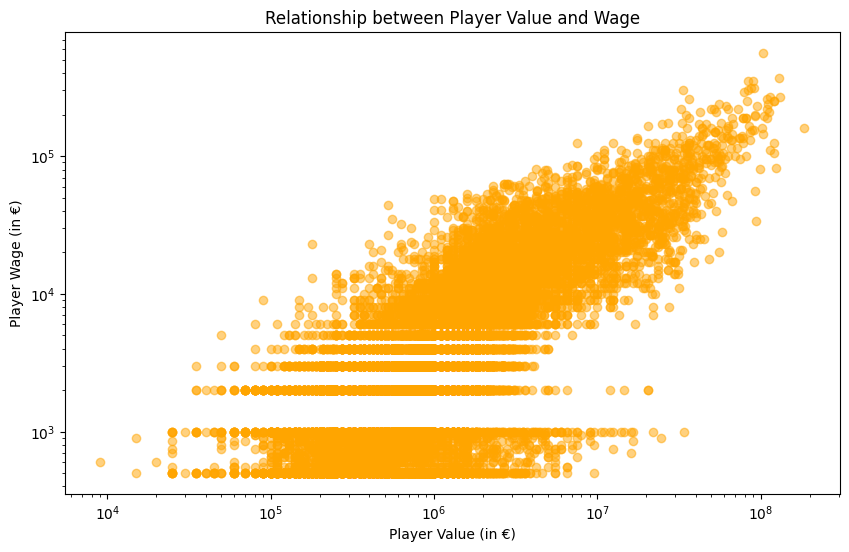

In [28]:
# Plot 3: Relationship between Player Value and Wage
plt.figure(figsize=(10, 6))
plt.scatter(df['Value'], df['Wage'], alpha=0.5, c='orange')
plt.title('Relationship between Player Value and Wage')
plt.xlabel('Player Value (in €)')
plt.ylabel('Player Wage (in €)')
plt.xscale('log')
plt.yscale('log')
plt.show()



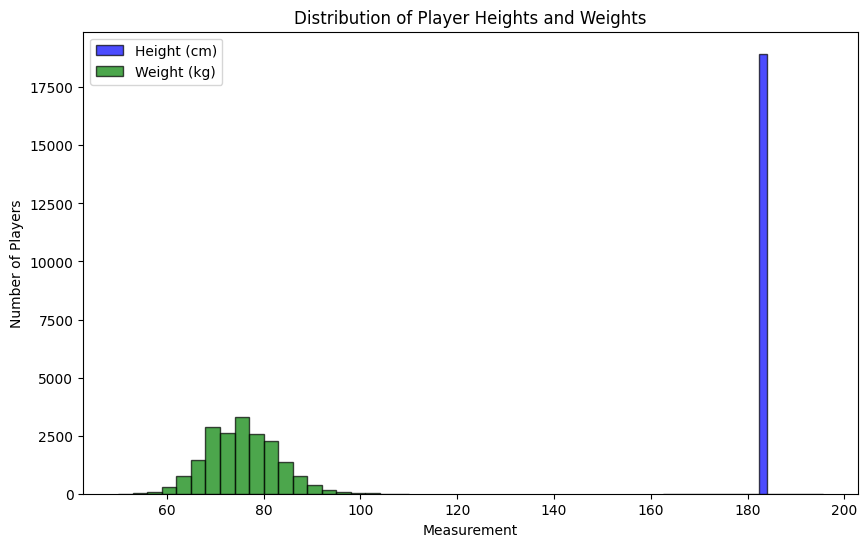

In [29]:
# Plot 4: Distribution of Player Heights and Weights
plt.figure(figsize=(10, 6))
plt.hist(df['Height'], bins=20, alpha=0.7, label='Height (cm)', color='blue', edgecolor='black')
plt.hist(df['Weight'], bins=20, alpha=0.7, label='Weight (kg)', color='green', edgecolor='black')
plt.title('Distribution of Player Heights and Weights')
plt.xlabel('Measurement')
plt.ylabel('Number of Players')
plt.legend()
plt.show()

In [30]:
# Calculate the overperformance threshold (players whose OVA is close to POT)
df['Performance_Ratio'] = df['↓OVA'] / df['POT']

# Define an overperformance threshold, e.g., 90% of potential rating
overperforming_threshold = 0.9
overperforming_players = df[df['Performance_Ratio'] >= overperforming_threshold]

# Group by nationality and count overperforming players
top_nations = overperforming_players['Nationality'].value_counts().head(10)

# Display results
print("Top nations with the most overperforming players:\n", top_nations)

Top nations with the most overperforming players:
 Nationality
England        893
Brazil         791
Germany        764
Spain          689
Argentina      625
France         584
Japan          381
Netherlands    282
China PR       275
Italy          271
Name: count, dtype: int64


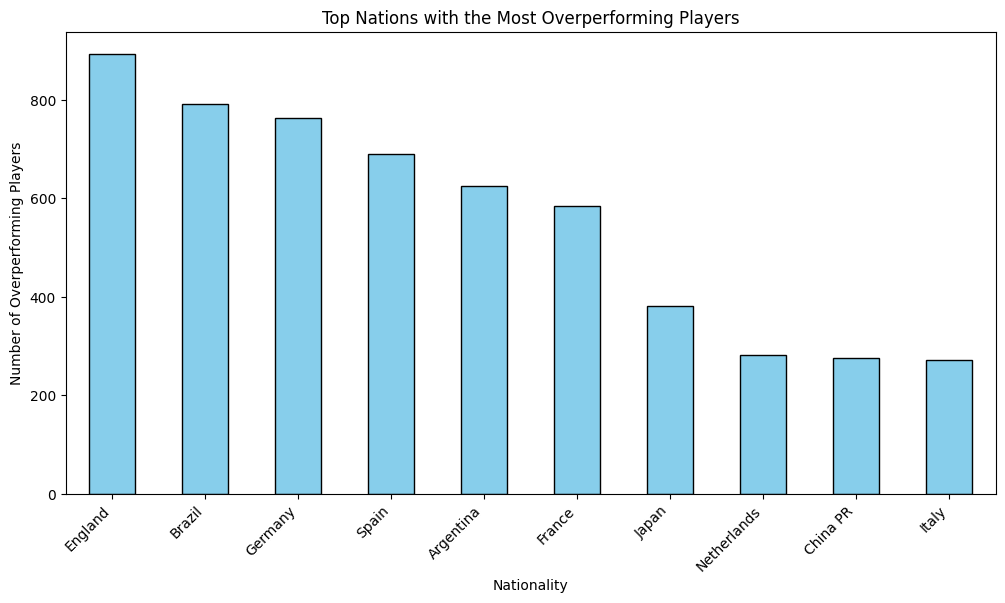

In [31]:


# Assuming 'top_nations' from the previous code contains the count of overperforming players by nationality
# If not, make sure to run the code in the previous step to get 'top_nations'

# Plotting the top nations with the most overperforming players
plt.figure(figsize=(12, 6))
top_nations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top Nations with the Most Overperforming Players')
plt.xlabel('Nationality')
plt.ylabel('Number of Overperforming Players')
plt.xticks(rotation=45, ha='right')
plt.show()


C:\Users\manir\AppData\Local\Temp\ipykernel_51588\2175815772.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_best_avg_cnt_filtered['Player Counts'] = sel_best_avg_cnt_filtered['Player Counts'] + np.random.uniform(-0.3, 0.3, sel_best_avg_cnt_filtered.shape[0])


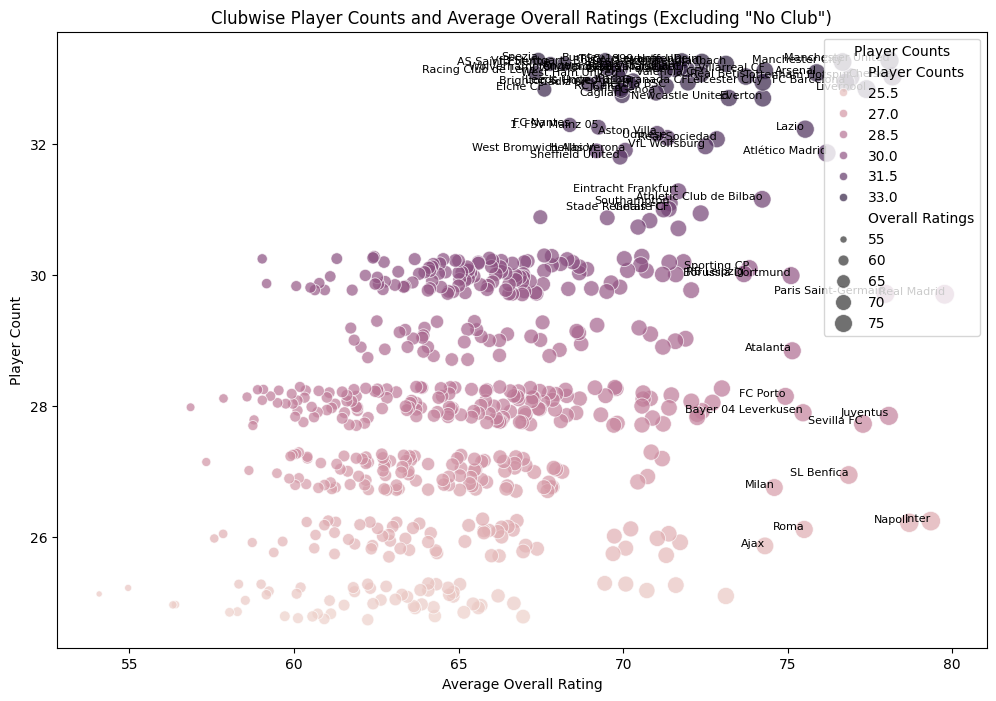

In [39]:
import numpy as np

# Exclude "No Club" to improve visualization
sel_best_avg_cnt_filtered = sel_best_avg_cnt[sel_best_avg_cnt['Club'] != 'No Club']

# Apply jitter to the Player Counts for better separation
sel_best_avg_cnt_filtered['Player Counts'] = sel_best_avg_cnt_filtered['Player Counts'] + np.random.uniform(-0.3, 0.3, sel_best_avg_cnt_filtered.shape[0])

# Plot without "No Club" category
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(
    data=sel_best_avg_cnt_filtered, 
    x='Overall Ratings', 
    y='Player Counts', 
    size='Overall Ratings', 
    hue='Player Counts', 
    sizes=(20, 200), 
    alpha=0.7,  # Add transparency
    legend='brief'
)

# Customize plot
scatter_plot.set_title('Clubwise Player Counts and Average Overall Ratings (Excluding "No Club")')
scatter_plot.set_xlabel('Average Overall Rating')
scatter_plot.set_ylabel('Player Count')
plt.legend(title='Player Counts', loc='upper right')

# Label only clubs with the highest player counts or ratings for clarity
for i, row in sel_best_avg_cnt_filtered.iterrows():
    if row['Player Counts'] > 31 or row['Overall Ratings'] > sel_best_avg_cnt_filtered['Overall Ratings'].quantile(0.95):
        plt.text(row['Overall Ratings'], row['Player Counts'], row['Club'], fontsize=8, ha='right')

plt.show()


